# COMSW4995_007_2018_3 Elements of Data Science 
# Homework 1

### Due: 9pm Oct. 4

In this homework we practice loading and transforming data.  
We'll also practice calculating summary statistics and a few visualizations.

## Instructions

Follow the comments below and fill in the blanks (\_\_\_\_) to complete.

---

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# tell jupyter to display images in the notebook
%matplotlib inline

# for pretty printing
import pprint

# To suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# To increase the number of rows pandas will print before truncation
pd.set_option('display.max_rows', 500)

# To increase the number of columns pandas will print before truncation
pd.set_option('display.max_columns', 100)

# To increase the width of each column pandas will print before truncating.
pd.set_option('display.max_colwidth',100)

## Part 1: College Football Dataset and total_score

Fall is college football season, so we'll first look at some data from the 2017 college football season.  
This data was gathered from 'http://sports.snoozle.net/'.

We'd like to find the total score for each game and the min, max and mean of the total scores.

In this dataset, each row contains information about a single game, visiting team info followed by home team.  
We'll need to combine two columns to find the total number of points.

This csv contains columns with duplicate names.
When there are columns with identical names, pandas attaches a suffix to discriminate them.  
All 'Home Team' columns will have a '.1' suffix.

In [34]:
# Load the data from ../data/cfb_2017.csv into the variable df_cfb
df_cfb = pd.read_csv('/Users/rainsunny/Desktop/COMSW4995_007_2018_3/data/cfb_2017.csv')

In [35]:
# Print the first 3 rows of the dataset using head
df_cfb.head(n=3)

,Date,Vis Team,Rushing Yards,Rushing Attempts,Passing Yards,Passing Attempts,Passing Completions,Penalties,Penalty Yards,Fumbles Lost,Interceptions Thrown,1st Downs,3rd Down Attempts,3rd Down Conversions,4th Down Attempts,4th Down conversions,Time of Possession,Score,Home Team,Rushing Yards.1,Rushing Attempts.1,Passing Yards.1,Passing Attempts.1,Passing Completions.1,Penalties.1,Penalty Yards.1,Fumbles Lost.1,Interceptions Thrown.1,1st Downs.1,3rd Down Attempts.1,3rd Down Conversions.1,4th Down Attempts.1,4th Down conversions.1,Time of Possession.1,Score.1
0,2017-08-26,Portland State,86,36,134,36,16,7,70,0,1,14,19,7,4,2,1821,6,BYU,171,35,194,27,16,7,70,0,0,13,13,4,1,0,1779,20
1,2017-08-26,USF,315,74,233,26,13,10,57,0,0,29,19,3,3,3,2190,42,San Jose State,109,38,278,50,25,9,64,0,3,18,21,7,2,1,1410,22
2,2017-08-26,Oregon State,152,29,304,47,27,3,21,2,3,23,16,10,0,0,1541,27,Colorado State,191,43,334,39,26,8,40,1,1,31,14,8,1,1,2059,58


In [36]:
# print out information about the dataframe using .info()
df_cfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 35 columns):
Date                      999 non-null object
Vis Team                  999 non-null object
Rushing Yards             999 non-null int64
Rushing Attempts          999 non-null int64
Passing Yards             999 non-null int64
Passing Attempts          999 non-null int64
Passing Completions       999 non-null int64
Penalties                 999 non-null int64
Penalty Yards             999 non-null int64
Fumbles Lost              999 non-null int64
Interceptions Thrown      999 non-null int64
1st Downs                 999 non-null int64
3rd Down Attempts         999 non-null int64
3rd Down Conversions      999 non-null int64
4th Down Attempts         999 non-null int64
4th Down conversions      999 non-null int64
Time of Possession        999 non-null int64
Score                     999 non-null int64
Home Team                 999 non-null object
Rushing Yards.1           999 non-nul

In [37]:
# How may records are in the dataset?
print('dataframe has {} records'.format(df_cfb.shape[0]))

dataframe has 999 records


In [38]:
# How many values are missing from the Score and Score.1 columns?
print('there are {} missing scores'.format(df_cfb.loc[pd.isna(df_cfb['Score.1']),'Score.1'].shape[0]))

there are 0 missing scores


In [39]:
# What is the average (mean) score for visiting teams?
print('the mean visiting team score is {:0.2f}'.format(df_cfb['Score'].mean()))

the mean visiting team score is 24.87


In [40]:
# To examine the total score, we need to combine Score and Score.1
# Create a new column called 'total_score' which is the sum of the 'Score' and 'Score.1' columns
df_cfb.total_score = df_cfb.loc[:,'Score'] + df_cfb.loc[:,'Score.1']

/anaconda3/envs/coms007/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# What is the average (mean) total score?
print('the mean total score is {:0.2f}'.format(df_cfb.total_score.mean()))

the mean total score is 55.98


In [42]:
# Use .describe to show other values associated with total score
df_cfb.total_score.describe

<bound method NDFrame.describe of 0       26
1       64
2       85
3       73
4       69
5       53
6       27
7       83
8       60
9       78
10      58
11      40
12      57
13      24
14      47
15      66
16      70
17      34
18      31
19      70
20      68
21      56
22      59
23      69
24      45
25      45
26      47
27      63
28      31
29      80
30      93
31      65
32      41
33      72
34      41
35      49
36      20
37      45
38      49
39      67
40      63
41      57
42      48
43      76
44      66
45      54
46      73
47      48
48     115
49      99
50      51
51      63
52      43
53      54
54      62
55      48
56      52
57      27
58      61
59      38
60      65
61      48
62      74
63      44
64      48
65      74
66      59
67      67
68      92
69      66
70      37
71      50
72      79
73      52
74      98
75      63
76      66
77      31
78      89
79      55
80      27
81      55
82      59
83      66
84      83
85      31
86      34
87      8

In [43]:
# what are the min and max values for total_score?
print('the minimum and maximum values are {} and {}'.format(df_cfb.total_score.min(),df_cfb.total_score.max()))

the minimum and maximum values are 6 and 139


In [44]:
# What were the team names and team scores for the game with the highest total score?
# We should see a single row with the columns: Vis Team, Score, Home Team, Score.1
#df_cfb[df_cfb.total_score.max()].head()

#df_cfb.total_score[df_cfb.total_score['Vis Team'].isin([139])]

df_cfb.loc[np.argmax(df_cfb.total_score,axis=1)]

Date                      2017-10-07
Vis Team                  W Michigan
Rushing Yards                    376
Rushing Attempts                  68
Passing Yards                    269
Passing Attempts                  31
Passing Completions               24
Penalties                         10
Penalty Yards                     95
Fumbles Lost                       0
Interceptions Thrown               2
1st Downs                         33
3rd Down Attempts                 19
3rd Down Conversions              11
4th Down Attempts                  1
4th Down conversions               0
Time of Possession              1861
Score                             71
Home Team                    Buffalo
Rushing Yards.1                   86
Rushing Attempts.1                33
Passing Yards.1                  597
Passing Attempts.1                61
Passing Completions.1             35
Penalties.1                        8
Penalty Yards.1                   64
Fumbles Lost.1                     2
I

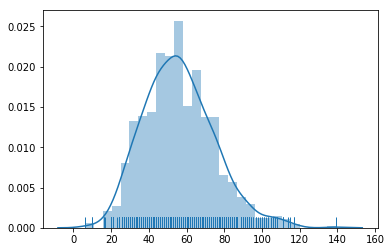

In [45]:
# Use seaborn distplot to plot the distribution of total_score
# Turn on rug to show each game's total score
ax = sns.distplot(df_cfb.total_score,rug = True)

---

## Part 2: World Bank Data

This data is provided by World Bank Open Data https://data.worldbank.org/.

It includes many country data indicators sampled over time.

There are two files we are interested in:
1. WDICountry.csv includes country and region information, one country or region per row.
2. WDIData.csv includes indicator data, one row per country and indicator.

We would like to be able to analyze a few indicators for countries grouped by region.  
To do that we will need to clean and join the two sets of records.

---

### Part 2a: Munge WDICountry

In [46]:
# Read Country information from '../data/WDICountry.csv' into df_country
# print the number of rows in df_country
df_country = pd.read_csv('/Users/rainsunny/Desktop/COMSW4995_007_2018_3/data/WDICountry.csv')
print('df_country has {} rows'.format(df_country.shape[1]))

df_country has 32 rows


In [47]:
# Print the first 3 rows of WDICountry
df_country.head(n=3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databa...,Latin America & Caribbean,High income,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2015.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,"Fiscal year end: March 20; reporting period for national accounts data is calendar year, estimat...",South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-GDDS),1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",NaN,NaN,NaN,2015.0,2000.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,Enhanced General Data Dissemination System (e-GDDS),2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2015.0,2005.0,NaN


In [48]:
# Using .columns, how many columns does WDICountry have?
print('df_country has {} columns'.format(len(df_country.columns)))

df_country has 32 columns


In [49]:
# We'll only keep a few columns: ['Country Code','Short Name','Region','Income Group']
# Overwrite df_country with a new dataframe containing only these columns
# Print out the statement 'df_country has {} columns' using .format to confirm that there are only 4 columns
df_country = df_country[['Country Code','Short Name','Region','Income Group']]
print('df_country has {} columns'.format(len(df_country.columns)))

df_country has 4 columns


In [50]:
# Examine df_country using .info
df_country.info

<bound method DataFrame.info of     Country Code                                          Short Name  \
0            ABW                                               Aruba   
1            AFG                                         Afghanistan   
2            AGO                                              Angola   
3            ALB                                             Albania   
4            AND                                             Andorra   
5            ARB                                          Arab World   
6            ARE                                United Arab Emirates   
7            ARG                                           Argentina   
8            ARM                                             Armenia   
9            ASM                                      American Samoa   
10           ATG                                 Antigua and Barbuda   
11           AUS                                           Australia   
12           AUT                

In [51]:
# There are some rows with missing Region and Income Group.
# Print out both the number and proportion of rows with missing Region information
n_missing = sum(df_country.Region.isnull()&df_country.loc[:,'Income Group'].isnull())
prop_missing = n_missing/df_country.shape[0]
print('there are {:} rows with missing data, {:0.2} of the dataset'.format(n_missing,prop_missing))

there are 46 rows with missing data, 0.17 of the dataset


In [52]:
# Drop the rows of df_country with any null values (using inplace=True)
# Use .info to make sure there a no longer null values
df_country.dropna(inplace=True)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 262
Data columns (total 4 columns):
Country Code    217 non-null object
Short Name      217 non-null object
Region          217 non-null object
Income Group    217 non-null object
dtypes: object(4)
memory usage: 8.5+ KB


In [53]:
# Each row of df_country should be a separate country
# Assert that there are no duplicates (use len and drop_duplicates)
# hint: df_country should be the same length before and after dropping duplicate rows
assert len(df_country) == len(df_country.drop_duplicates(keep='first'))

In [54]:
# Assert that 'Country Code' is unique (use len and unique)
# hist: the number of unique country codes should be the same length as the dataframe
assert len(df_country.loc[:,'Country Code'].index.unique()) == len(df_country)

In [55]:
# Set the index (.set_index) of df_country to be 'Country Code' (inplace) and display the first 5 rows
df_country.set_index("Country Code", inplace = True)

---

### Part 2b: Munge WDIData

In [56]:
# Now we'll load the other country data we're interested in.
# Read csv '../data/WDIData.csv.zip' into df_data
# Note: 
#  Since this file is large it is stored as a zip.
#  You don't need to decompress the zip file first, pandas will handle this for you.
df_data = pd.read_csv('/Users/rainsunny/Desktop/COMSW4995_007_2018_3/data/WDIData.csv.zip')

In [57]:
# Display .info for df_data
# Note that the data is in long format instead of wide format
(df_data.melt()).info

<bound method DataFrame.info of               variable       value
0         Country Name  Arab World
1         Country Name  Arab World
2         Country Name  Arab World
3         Country Name  Arab World
4         Country Name  Arab World
5         Country Name  Arab World
6         Country Name  Arab World
7         Country Name  Arab World
8         Country Name  Arab World
9         Country Name  Arab World
10        Country Name  Arab World
11        Country Name  Arab World
12        Country Name  Arab World
13        Country Name  Arab World
14        Country Name  Arab World
15        Country Name  Arab World
16        Country Name  Arab World
17        Country Name  Arab World
18        Country Name  Arab World
19        Country Name  Arab World
20        Country Name  Arab World
21        Country Name  Arab World
22        Country Name  Arab World
23        Country Name  Arab World
24        Country Name  Arab World
25        Country Name  Arab World
26        Country Name 

In [58]:
# Use pprint.pprint to print a list of the unique values in Indicator Name
# These are all of the available data points in this file, which is why it's so large.
# (to see the difference, try using the standard 'print' first)
pprint.pprint(df_data.loc[:,'Indicator Name'])

0                                                   2005 PPP conversion factor, GDP (LCU per international $)
1                                   2005 PPP conversion factor, private consumption (LCU per international $)
2                                       Access to clean fuels and technologies for cooking  (% of population)
3                                                                     Access to electricity (% of population)
4                                                        Access to electricity, rural (% of rural population)
5                                                        Access to electricity, urban (% of urban population)
6                                                                                    Account (% age 15+) [ts]
7                                                              Account at a financial institution (% age 15+)
8                                                      Account at a financial institution, female (% age 15+)
9         

In [76]:
# We'll only keep a few of these indicators.
# Create a list of indicators to keep that includes these indicators:
# 'Employment to population ratio, 15+, female (%) (modeled ILO estimate)','GDP (constant 2010 US$)','Population, total','Population density (people per sq. km of land area)','Unemployment, total (% of total labor force) (national estimate)'
data_indicators_to_keep = ["Employment to population ratio, 15+, female (%) (modeled ILO estimate)","GDP (constant 2010 US$)","Population, total","Population density (people per sq. km of land area)","Unemployment, total (% of total labor force) (national estimate)"]

In [77]:
# The columns of WIData contain information for each year.
# We'll look at only year 2016
# Create a list of columns to keep that includes these columns:
# 'Country Code','Indicator Name','2016'
data_columns_to_keep = df_data.loc[:,['Country Code','Indicator Name','2016']]

In [ ]:
# Overwrite df_data witha dataframe containing only: 
#  the rows whose 'Indicator Name' is in data_indicators_to_keep (use .isin) and 
#  the columns in data_columns_to_keep
df_data = [df_data['Indicator Name'].isin['data_indicators_to_keep'],data_columns_to_keep]

In [79]:
# Display the first 5 rows of df_data
df_data.head(n=5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per international $)",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumption (LCU per international $)",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.599691,77.443095,78.244950,79.019267,79.792525,80.570694,81.349369,82.112282,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.148698,76.563545,74.066866,74.846070,75.303935,76.042330,76.768569,77.147080,77.985792,78.553012,79.236166,79.768294,80.229593,80.968355,82.628794,83.351979,83.787901,84.391665,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural population)",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.358095,60.178350,61.295216,62.106617,62.967334,63.729726,64.701319,64.952707,66.387754,64.089342,65.189090,65.527418,66.220836,67.480753,67.516663,70.091789,70.265305,71.237599,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [80]:
# Into df_data_pivot, .pivot df_data with index 'Country Code', columns 'Indicator Name' and values '2016'
# Display the first 5 rows of df_data_pivot
df_data_pivot = df_data.pivot(index='Country Code',columns='Indicator Name',values='2016')
df_data_pivot.head(n=5)

Indicator Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account (% age 15+) [ts],Account at a financial institution (% age 15+),"Account at a financial institution, female (% age 15+)","Account at a financial institution, income, poorest 40% (% ages 15+)","Account at a financial institution, income, richest 60% (% ages 15+)","Account at a financial institution, male (% age 15+)","Account, female (% age 15+) [ts]","Account, income, poorest 40% (% ages 15+) [ts]","Account, income, richest 60% (% ages 15+) [ts]","Account, male (% age 15+) [ts]","Account, older adults (% ages 25+) [ts]","Account, primary education or less (% ages 15+) [ts]","Account, secondary education or more (% ages 15+) [ts]","Account, young adults (% ages 15-24) [ts]",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2010 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: gross savings (% of GNI),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: mineral depletion (current US$),Adjusted savings: natural resources depletion (% of GNI),...,Unemployment with basic education (% of total labor force with basic education),"Unemployment with basic education, female (% of female labor force with basic education)","Unemployment with basic education, male (% of male labor force with basic education)",Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment with intermediate education, female (% of female labor force with intermediate education)","Unemployment with intermediate education, male (% of male labor force with intermediate education)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled IL

### Part 2c: Join the two datasets

In [81]:
# Importantly, df_country and df_data_pivot now have the the same index values.
# To see this, use .index to print out the first 5 index values in df_country and df_data
print('The first 5 index values in df_country are {}.'.format(df_country.head(n=5)))
print('The first 5 index values in df_data are {}.'.format(df_data.head(n=5)))

The first 5 index values in df_country are                Short Name                     Region         Income Group
Country Code                                                             
ABW                 Aruba  Latin America & Caribbean          High income
AFG           Afghanistan                 South Asia           Low income
AGO                Angola         Sub-Saharan Africa  Lower middle income
ALB               Albania      Europe & Central Asia  Upper middle income
AND               Andorra      Europe & Central Asia          High income.
The first 5 index values in df_data are   Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                                              Indicator Name  \
0                  2005 PPP conversion factor, GDP (LCU per international $)   
1  2005 PPP conversion factor, private consumption 

In [86]:
# Into df_wdi put the inner join of df_country with df_data_pivot using .join
# Display the first 5 rows
df_wdi = df_country.join(df_data_pivot,how='inner')
df_wdi.head(n=5)

,Short Name,Region,Income Group,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account (% age 15+) [ts],Account at a financial institution (% age 15+),"Account at a financial institution, female (% age 15+)","Account at a financial institution, income, poorest 40% (% ages 15+)","Account at a financial institution, income, richest 60% (% ages 15+)","Account at a financial institution, male (% age 15+)","Account, female (% age 15+) [ts]","Account, income, poorest 40% (% ages 15+) [ts]","Account, income, richest 60% (% ages 15+) [ts]","Account, male (% age 15+) [ts]","Account, older adults (% ages 25+) [ts]","Account, primary education or less (% ages 15+) [ts]","Account, secondary education or more (% ages 15+) [ts]","Account, young adults (% ages 15-24) [ts]",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2010 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: gross savings (% of GNI),...,Unemployment with basic education (% of total labor force with basic education),"Unemployment with basic education, female (% of female labor force with basic education)","Unemployment with basic education, male (% of male labor force with basic education)",Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment with intermediate education, female (% of female labor force with intermediate education)","Unemployment with intermediate education, male (% of male labor force with intermediate education)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male l

In [87]:
# Assert that the number of rows matches the number of unique 'Short Name'
assert len(df_wdi) == len(df_wdi.loc[:,'Short Name'].index.unique())

---

### Part 2d: Analysis and Visualization

In [88]:
# Display the number of countries per region seen in df_wdi (use .value_counts)
df_wdi.Region.value_counts().head()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
Name: Region, dtype: int64

In [89]:
# What proportion of our dataset is made up by each region?
# Hint: Divide the output of value_counts by the number of rows.
df_wdi.Region.value_counts()/len(df_wdi)

Europe & Central Asia         0.267281
Sub-Saharan Africa            0.221198
Latin America & Caribbean     0.193548
East Asia & Pacific           0.170507
Middle East & North Africa    0.096774
South Asia                    0.036866
North America                 0.013825
Name: Region, dtype: float64

In [108]:
# Display the summary stats (means and quartiles) for 'Employment to population ratio, 15+, female (%) (modeled ILO estimate)'
df_wdi['Employment to population ratio, 15+, female (%) (modeled ILO estimate)'].describe()

count    186.000000
mean      47.462634
std       16.062377
min        8.228000
25%       38.205749
50%       47.550499
75%       56.925750
max       84.007004
Name: Employment to population ratio, 15+, female (%) (modeled ILO estimate), dtype: float64

In [115]:
# Let's rename that column to something shorter.
# Use .rename to rename (inplace)
#  'Employment to population ratio, 15+, female (%) (modeled ILO estimate)' 
#  to 
#  'Female Employment To Population Ratio'
# Display the columns to confirm.
df_wdi.rename({'Employment to population ratio, 15+, female (%) (modeled ILO estimate)':'Female Employment To Population Ratio'},inplace=True)
df_wdi.head(n=1)

,Short Name,Region,Income Group,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account (% age 15+) [ts],Account at a financial institution (% age 15+),"Account at a financial institution, female (% age 15+)","Account at a financial institution, income, poorest 40% (% ages 15+)","Account at a financial institution, income, richest 60% (% ages 15+)","Account at a financial institution, male (% age 15+)","Account, female (% age 15+) [ts]","Account, income, poorest 40% (% ages 15+) [ts]","Account, income, richest 60% (% ages 15+) [ts]","Account, male (% age 15+) [ts]","Account, older adults (% ages 25+) [ts]","Account, primary education or less (% ages 15+) [ts]","Account, secondary education or more (% ages 15+) [ts]","Account, young adults (% ages 15-24) [ts]",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2010 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: gross savings (% of GNI),...,Unemployment with basic education (% of total labor force with basic education),"Unemployment with basic education, female (% of female labor force with basic education)","Unemployment with basic education, male (% of male labor force with basic education)",Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment with intermediate education, female (% of female labor force with intermediate education)","Unemployment with intermediate education, male (% of male labor force with intermediate education)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male l

In [ ]:
# Use seaborn .catplot to display box plots of 'Female Employment Ratio' for each Region
# Since the region names are long, we'll use horizontal box plots.
# Put 'Female Employment To Population Ratio' on the x-axis and 'Region' on the y-axis.
# Set 'aspect' to 2 to widen the plot
x = sns.catplot(x='Female Employment To Population Ratio', y='', data=df_wdi, kind='box', aspect=2, vert=False)